In [1]:
from __future__ import print_function, unicode_literals, absolute_import, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from tifffile import imread
from csbdeep.utils import axes_dict, plot_some, plot_history
from csbdeep.utils.tf import limit_gpu_memory
from csbdeep.io import load_training_data
from csbdeep.models import Config, ProjectionCARE

Using TensorFlow backend.


In [2]:

(X,Y), (X_val,Y_val), axes = load_training_data('/data/u934/service_imagerie/v_kapoor/CurieTrainingDatasets/Drosophilla/DenoisingProjection.npz', validation_split=0.1, verbose=True)

c = axes_dict(axes)['C']
n_channel_in, n_channel_out = X.shape[c], Y.shape[c]

number of training images:	 23270
number of validation images:	 2586
image size (3D):		 (26, 128, 128)
axes:				 SZYXC
channels in / out:		 1 / 1


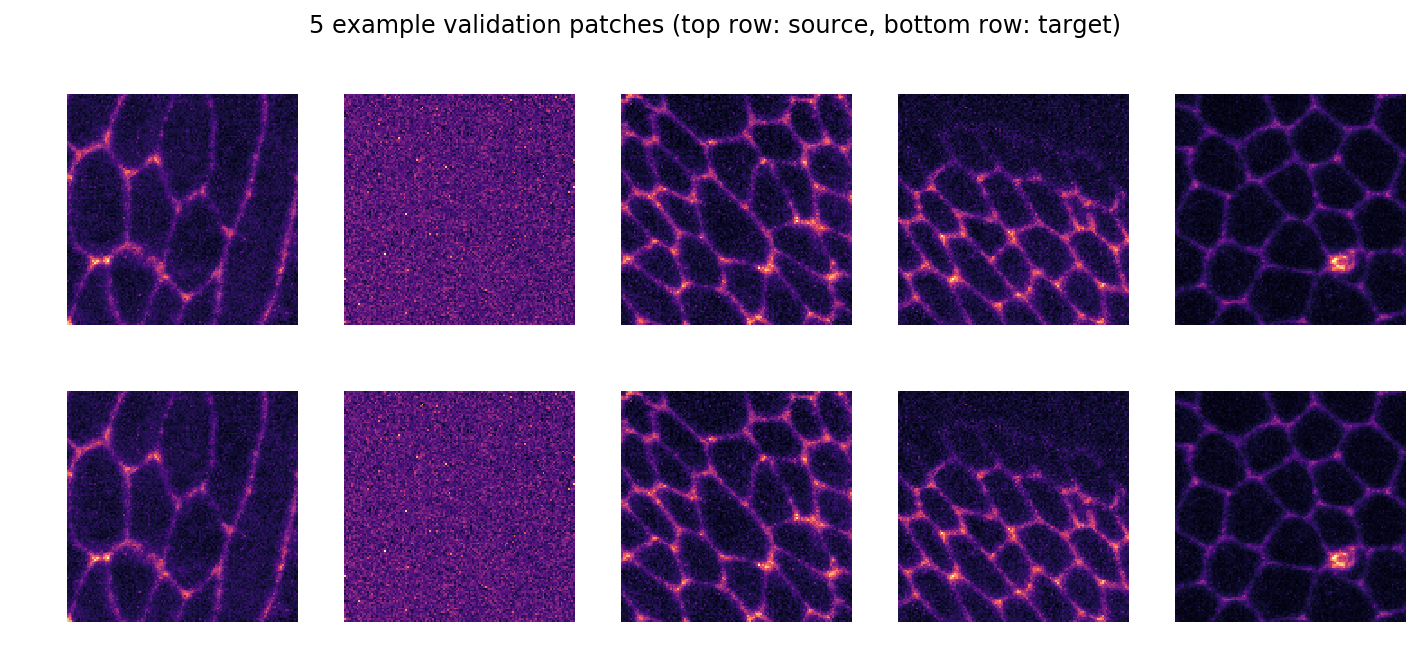

In [3]:
plt.figure(figsize=(12,5))
plot_some(X_val[:5],Y_val[:5])
plt.suptitle('5 example validation patches (top row: source, bottom row: target)');

In [4]:
config = Config(axes, n_channel_in, n_channel_out, unet_n_depth=4,train_epochs= 50,train_steps_per_epoch = 400, train_batch_size = 16, train_reduce_lr={'patience': 5, 'factor': 0.5})
print(config)
vars(config)

Config(axes='ZYXC', n_channel_in=1, n_channel_out=1, n_dim=3, probabilistic=False, train_batch_size=16, train_checkpoint='weights_best.h5', train_epochs=50, train_learning_rate=0.0004, train_loss='mae', train_reduce_lr={'factor': 0.5, 'patience': 5}, train_steps_per_epoch=400, train_tensorboard=True, unet_input_shape=(None, None, None, 1), unet_kern_size=3, unet_last_activation='linear', unet_n_depth=4, unet_n_first=32, unet_residual=True)


{'axes': 'ZYXC',
 'n_channel_in': 1,
 'n_channel_out': 1,
 'n_dim': 3,
 'probabilistic': False,
 'train_batch_size': 16,
 'train_checkpoint': 'weights_best.h5',
 'train_epochs': 50,
 'train_learning_rate': 0.0004,
 'train_loss': 'mae',
 'train_reduce_lr': {'factor': 0.5, 'patience': 5},
 'train_steps_per_epoch': 400,
 'train_tensorboard': True,
 'unet_input_shape': (None, None, None, 1),
 'unet_kern_size': 3,
 'unet_last_activation': 'linear',
 'unet_n_depth': 4,
 'unet_n_first': 32,
 'unet_residual': True}

In [5]:
model = ProjectionCARE(config, 'DrosophilaDenoisingProjection', basedir='/data/u934/service_imagerie/v_kapoor/CurieDeepLearningModels')

/data/u934/service_imagerie/v_kapoor/anaconda2/envs/tensorflowpy3pt5/lib/python3.5/site-packages/csbdeep/models/care_standard.py:139: UserWarning: output path for model already exists, files may be overwritten: /data/u934/service_imagerie/v_kapoor/CurieDeepLearningModels/DrosophilaDenoisingProjection
  warnings.warn('output path for model already exists, files may be overwritten: %s' % str(self.logdir.resolve()))


In [6]:
history = model.train(X,Y, validation_data=(X_val,Y_val))

Epoch 1/50
400/400 [==============================] - 804s 2s/step - loss: 0.0327 - mse: 0.0025 - mae: 0.0327 - val_loss: 0.0290 - val_mse: 0.0016 - val_mae: 0.0290
Epoch 2/50
400/400 [==============================] - 799s 2s/step - loss: 0.0288 - mse: 0.0016 - mae: 0.0288 - val_loss: 0.0285 - val_mse: 0.0016 - val_mae: 0.0285
Epoch 3/50
400/400 [==============================] - 796s 2s/step - loss: 0.0285 - mse: 0.0016 - mae: 0.0285 - val_loss: 0.0285 - val_mse: 0.0016 - val_mae: 0.0285
Epoch 4/50
400/400 [==============================] - 797s 2s/step - loss: 0.0282 - mse: 0.0015 - mae: 0.0282 - val_loss: 0.0287 - val_mse: 0.0015 - val_mae: 0.0287
Epoch 5/50
400/400 [==============================] - 796s 2s/step - loss: 0.0280 - mse: 0.0015 - mae: 0.0280 - val_loss: 0.0280 - val_mse: 0.0016 - val_mae: 0.0280
Epoch 6/50
400/400 [==============================] - 796s 2s/step - loss: 0.0279 - mse: 0.0015 - mae: 0.0279 - val_loss: 0.0279 - val_mse: 0.0015 - val_mae: 0.0279
Epoch 7/50

Epoch 48/50
400/400 [==============================] - 797s 2s/step - loss: 0.0265 - mse: 0.0014 - mae: 0.0265 - val_loss: 0.0266 - val_mse: 0.0014 - val_mae: 0.0266
Epoch 49/50
400/400 [==============================] - 796s 2s/step - loss: 0.0265 - mse: 0.0014 - mae: 0.0265 - val_loss: 0.0266 - val_mse: 0.0014 - val_mae: 0.0266

Epoch 00049: ReduceLROnPlateau reducing learning rate to 6.24999984211172e-06.
Epoch 50/50
400/400 [==============================] - 797s 2s/step - loss: 0.0265 - mse: 0.0014 - mae: 0.0265 - val_loss: 0.0266 - val_mse: 0.0014 - val_mae: 0.0266

Loading network weights from 'weights_best.h5'.


['loss', 'lr', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse']


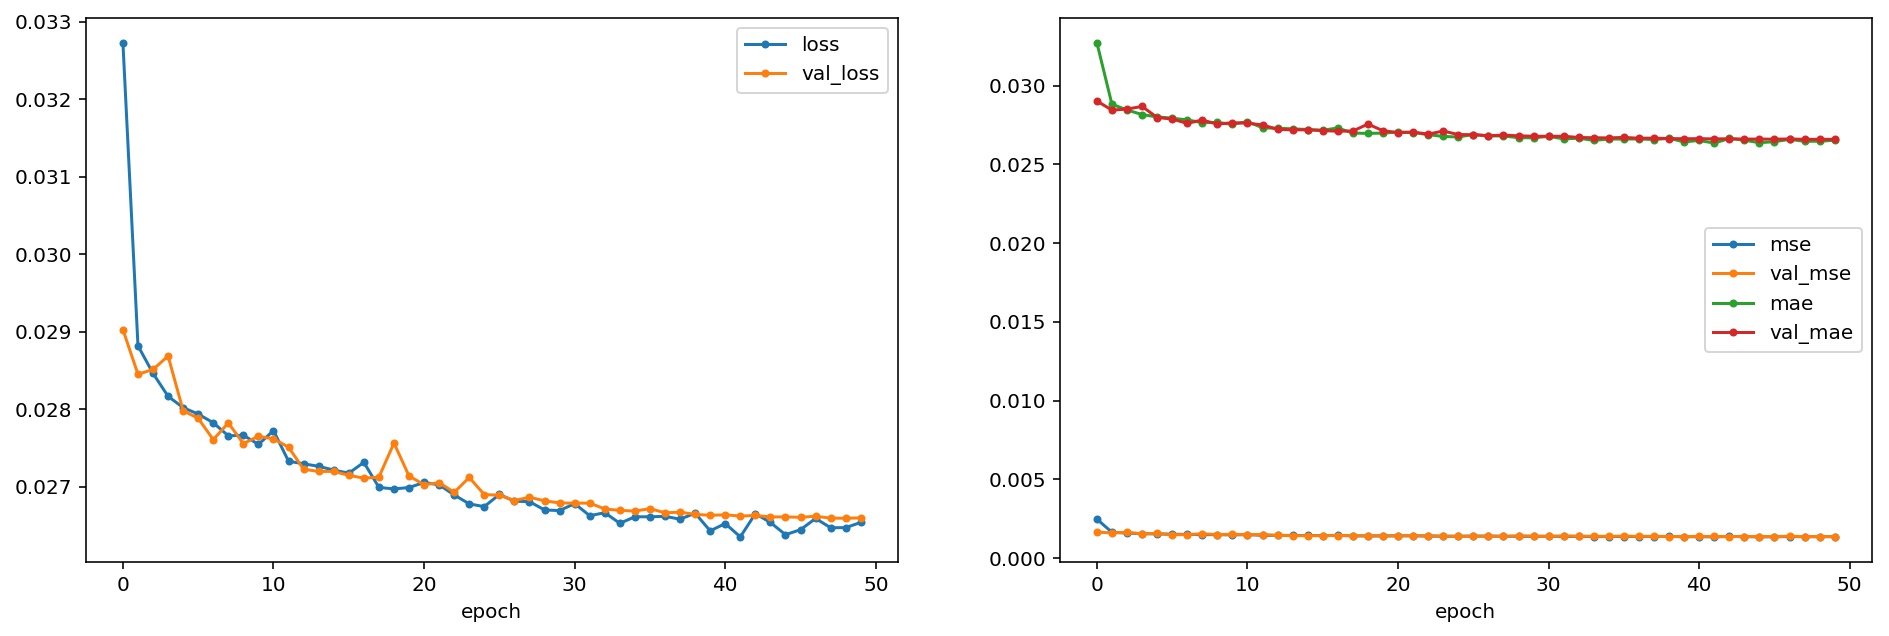

In [7]:
print(sorted(list(history.history.keys())))
plt.figure(figsize=(16,5))
plot_history(history,['loss','val_loss'],['mse','val_mse','mae','val_mae']);

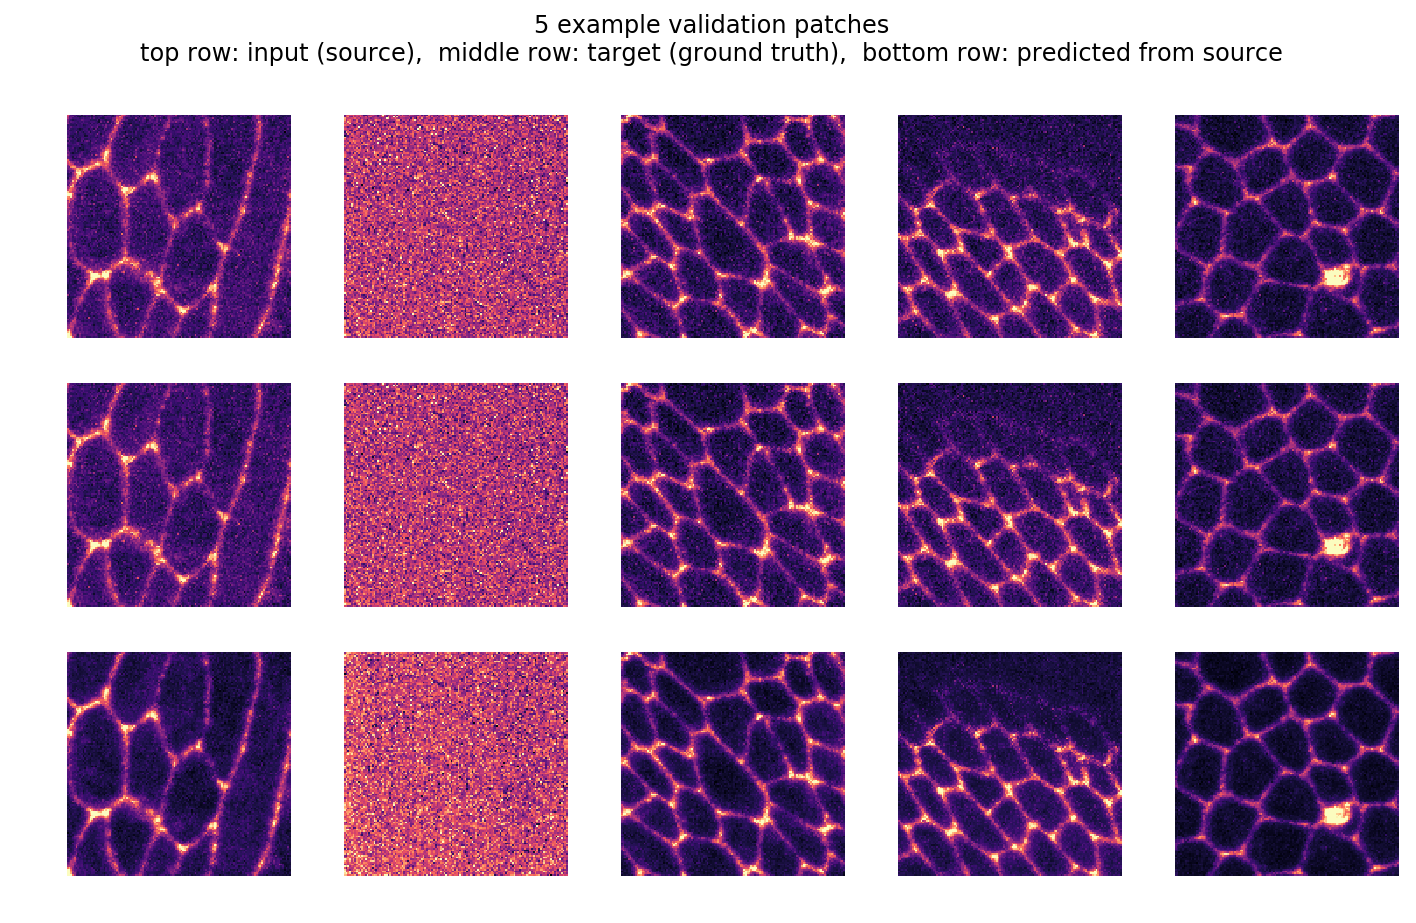

In [8]:
plt.figure(figsize=(12,7))
_P = model.keras_model.predict(X_val[:5])
if config.probabilistic:
    _P = _P[...,:(_P.shape[-1]//2)]
plot_some(X_val[:5],Y_val[:5],_P,pmax=99.5)
plt.suptitle('5 example validation patches\n'      
             'top row: input (source),  '          
             'middle row: target (ground truth),  '
             'bottom row: predicted from source');

In [9]:
model.export_TF()

INFO:tensorflow:No assets to save.
INFO:tensorflow:No assets to write.
INFO:tensorflow:SavedModel written to: /tmp/tmpyq9eti5c/model/saved_model.pb

Model exported in TensorFlow's SavedModel format:
/data/u934/service_imagerie/v_kapoor/CurieDeepLearningModels/DrosophilaDenoisingProjection/TF_SavedModel.zip
